### Package Requirements
- numpy, pandas, sktime, scikit-learn, scikitplot, matplotlib

# Time series approach

In [21]:
from  raptor_functions.datasets import get_data
from raptor_functions.preprocess import preprocess_all_files, preprocess_single_file
from raptor_functions.feature_selection import get_train_features
from raptor_functions.metrics import eval_metrics

In [2]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder


import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics, model_selection


In [3]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

In [4]:
import sktime

In [5]:
# dir(sktime.classification.interval_based)

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.shapelet_based import MrSEQLClassifier
from sktime.datasets import load_basic_motions
from sktime.transformations.panel.compose import ColumnConcatenator

In [7]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
# from sktime.classification.shapelet_based import MrSEQLClassifier
from sktime.transformations.panel.compose import ColumnConcatenator
from sklearn.model_selection import train_test_split
from sktime.datatypes._panel._convert import (
    from_multi_index_to_nested,
    from_nested_to_multi_index,
)

In [8]:
# from raptor_functions.raptor_data import load_validated_breath_dataset
# df = load_validated_breath_dataset()
# df.head()

In [169]:
# path = '/home/amash/Desktop/Projects/Raptor/raptor_mlflow_pycaret/Samples/*.txt'
path = '/home/amash/Desktop/Projects/Raptor/raptor_functions/NoRepeats/*.txt'
df_all = preprocess_all_files(path)
# df_all = preprocess_all_files(no_repeat_path)
df_all.shape


(1530, 34)

In [157]:
df, _, _ = get_train_features(df_all)
X = df.drop('result', axis=1)
y = df['result'].replace({'Control': 0, 'Covid': 1})
X.shape, y.shape, df.shape

((200, 12), (200,), (200, 13))

In [158]:
df.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,result
41,288.901,267.677,313.133,313.300,290.596,309.742,311.199,303.559,290.405,306.066,284.437,239.268,Control
42,287.015,265.624,313.610,313.013,289.665,309.575,310.530,302.389,289.068,305.875,282.789,236.141,Control
43,297.758,268.919,312.894,312.774,288.782,308.835,310.124,301.578,287.206,304.729,280.856,239.698,Control
44,308.979,282.933,313.395,312.918,287.851,308.573,309.456,301.053,285.535,305.183,281.381,255.359,Control
45,313.873,295.705,312.273,312.679,286.418,307.713,309.361,301.148,284.484,306.257,284.986,272.261,Control


In [162]:
# df_all = load_validated_breath_dataset()

# df_all = df_all.drop(['exp_name', 'humidity', 'measurement_stage', 'date_exp', 'time_elapsed', 'datetime_exp', 'filename'], axis = 1)
# df_all['result'] = df_all['result'].replace({'Control':0, 'Covid':1})
# X = df_all.drop(['exp_unique_id', 'timesteps', 'result'], axis=1)
# y = df_all['result'].replace({'Control': 0, 'Covid': 1})

# df_all = get_train_features(df_all)

# print(result)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

X_mi = df_all.groupby(['exp_unique_id', 'timesteps']).mean()
X_nested = from_multi_index_to_nested(X_mi, instance_index="exp_unique_id").drop(['humidity', 'time_elapsed'], axis=1)
y_nested = df_all.groupby('exp_unique_id').first()['result'].replace({'Control':0, 'Covid':1})

X_nested_train, X_nested_test, y_nested_train, y_nested_test = train_test_split(X_nested, y_nested, stratify=y_nested, random_state=42)


In [163]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 12), (50, 12), (150,), (50,))

In [164]:
X_nested_train.shape, X_nested_test.shape, y_nested_train.shape, y_nested_test.shape

((7, 24), (3, 24), (7,), (3,))

In [165]:
X_nested.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24
0,0.0 316.164 1.0 316.737 2.0 316...,0.0 315.878 1.0 316.236 2.0 315...,0.0 315.711 1.0 315.639 2.0 316...,0.0 313.968 1.0 314.278 2.0 314...,0.0 310.912 1.0 311.461 2.0 311...,0.0 315.544 1.0 315.568 2.0 315...,0.0 316.045 1.0 316.188 2.0 316...,0.0 316.714 1.0 315.997 2.0 315...,0.0 316.141 1.0 316.523 2.0 316...,0.0 316.141 1.0 315.926 2.0 315...,...,0.0 103.333 1.0 103.452 2.0 103...,0.0 104.311 1.0 104.526 2.0 104...,0.0 107.749 1.0 107.797 2.0 107...,0.0 103.643 1.0 103.380 2.0 103...,0.0 103.357 1.0 103.285 2.0 103...,0.0 103.070 1.0 103.237 2.0 103...,0.0 103.213 1.0 103.333 2.0 103...,0.0 103.619 1.0 103.691 2.0 103...,0.0 103.333 1.0 103.452 2.0 103...,0.0 103.667 1.0 103.548 2.0 103...
1,0.0 316.905 1.0 317.334 2.0 316...,0.0 315.496 1.0 316.284 2.0 316...,0.0 316.308 1.0 315.854 2.0 316...,0.0 314.756 1.0 314.302 2.0 314...,0.0 311.414 1.0 311.247 2.0 311...,0.0 315.854 1.0 315.950 2.0 315...,0.0 316.642 1.0 316.260 2.0 316...,0.0 315.830 1.0 316.284 2.0 315...,0.0 315.496 1.0 316.403 2.0 316...,0.0 315.424 1.0 315.544 2.0 315...,...,0.0 103.476 1.0 103.643 2.0 103...,0.0 104.502 1.0 104.717 2.0 104...,0.0 107.558 1.0 107.725 2.0 107...,0.0 103.404 1.0 103.476 2.0 103...,0.0 103.380 1.0 103.428 2.0 103...,0.0 103.237 1.0 103.213 2.0 103...,0.0 103.404 1.0 103.166 2.0 103...,0.0 103.619 1.0 103.667 2.0 103...,0.0 103.309 1.0 103.428 2.0 103...,0.0 103.667 1.0 103.691 2.0 103...
2,0.0 316.594 1.0 316.546 2.0 316...,0.0 316.618 1.0 315.735 2.0 316...,0.0 315.806 1.0 316.284 2.0 315...,0.0 314.493 1.0 314.756 2.0 314...,0.0 311.294 1.0 310.984 2.0 310...,0.0 315.878 1.0 315.997 2.0 315...,0.0 315.973 1.0 316.117 2.0 316...,0.0 315.878 1.0 315.902 2.0 316...,0.0 315.950 1.0 315.973 2.0 316...,0.0 315.400 1.0 315.759 2.0 315...,...,0.0 103.762 1.0 103.524 2.0 103...,0.0 104.622 1.0 104.526 2.0 104...,0.0 108.036 1.0 108.227 2.0 108...,0.0 103.237 1.0 103.452 2.0 103...,0.0 103.357 1.0 103.380 2.0 103...,0.0 103.213 1.0 103.237 2.0 103...,0.0 103.380 1.0 103.333 2.0 103...,0.0 103.858 1.0 103.715 2.0 103...,0.0 103.333 1.0 103.357 2.0 103...,0.0 103.571 1.0 103.595 2.0 103...
3,0.0 316.499 1.0 317.024 2.0 316...,0.0 316.332 1.0 316.093 2.0 316...,0.0 315.973 1.0 315.806 2.0 315...,0.0 314.135 1.0 314.589 2.0 314...,0.0 311.390 1.0 311.676 2.0 311...,0.0 315.973 1.0 316.069 2.0 315...,0.0 316.212 1.0 316.308 2.0 316...,0.0 315.997 1.0 316.188 2.0 316...,0.0 316.141 1.0 316.451 2.0 316...,0.0 315.448 1.0 315.711 2.0 315...,...,0.0 103.619 1.0 103.500 2.0 103...,0.0 104.431 1.0 104.431 2.0 104...,0.0 107.701 1.0 107.654 2.0 107...,0.0 103.380 1.0 103.500 2.0 103...,0.0 103.380 1.0 103.428 2.0 103...,0.0 103.309 1.0 103.213 2.0 103...,0.0 103.404 1.0 103.285 2.0 103...,0.0 103.548 1.0 103.643 2.0 103...,0.0 103.380 1.0 103.357 2.0 103...,0.0 103.500 1.0 103.428 2.0 103...
4,0.0 316.666 1.0 316.737 2.0 316...,0.0 316.451 1.0 316.737 2.0 316...,0.0 315.902 1.0 316.141 2.0 316...,0.0 314.446 1.0 314.326 2.0 314...,0.0 311.127 1.0 311.605 2.0 311...,0.0 316.308 1.0 315.759 2.0 316...,0.0 316.188 1.0 316.642 2.0 316...,0.0 315.997 1.0 315.878 2.0 315...,0.0 316.141 1.0 315.950 2.0 315...,0.0 315.711 1.0 315.257 2.0 315...,...,0.0 103.571 1.0 103.571 2.0 103...,0.0 104.407 1.0 104.502 2.0 104...,0.0 108.083 1.0 108.012 2.0 108...,0.0 103.571 1.0 103.213 2.0 103...,0.0 103.452 1.0 103.309 2.0 103...,0.0 103.237 1.0 103.237 2.0 103...,0.0 103.189 1.0 103.380 2.0 103...,0.0 103.524 1.0 103.739 2.0 103...,0.0 103.261 1.0 103.357 2.0 103...,0.0 103.667 1.0 103.452 2.0 103...


In [166]:
# export NEPTUNE_API_TOKEN="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI0MGU4MjZiNS0wYzAzLTRlZjQtODNlNS04MTY5OGRkYzhjMmQifQ=="
# export NEPTUNE_PROJECT="iaanimashaun/raptor"

In [133]:
from xgboost import XGBClassifier


In [167]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)


[13:24:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [168]:
accuracy, sensitivity, specificity, precision = eval_metrics(y_test, pred)
accuracy, sensitivity, specificity, precision

(0.58, 0.6, 0.56, 0.5769230769230769)

In [161]:
accuracy, sensitivity, specificity, precision = eval_metrics(y_test, pred)
accuracy, sensitivity, specificity, precision

(0.6, 0.6, 0.6, 0.6)

### preprocess data
- convert pandas dataframe to multi index dataframe 
- convert from multi index dataframe to nested dataframe
- we now have data in this format (samples or window, timesteps or data points, features)
- the samples or windows is each experiment
- time steps is data points
- features is are the sensor signals and other features

In [67]:
df.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,result
37,285.559,261.518,312.989,313.276,291.097,309.623,311.008,301.244,288.424,305.612,284.031,232.154,Control
38,284.819,262.354,312.703,312.297,289.928,309.599,310.888,301.673,287.445,305.063,282.956,233.109,Control
39,285.296,262.616,312.703,313.419,289.999,309.193,310.936,302.007,287.373,305.326,282.240,234.350,Control
40,285.368,264.287,312.989,313.228,289.856,308.764,310.172,301.721,286.585,305.111,282.121,234.446,Control
37,286.108,261.088,313.085,313.061,290.787,309.480,311.175,301.363,287.683,305.636,283.959,231.294,Covid


### Dropping other columns and using only sensor arrays for model training

In [18]:
df_train = df.drop(['exp_name', 'humidity', 'measurement_stage', 'date_exp', 'time_elapsed', 'datetime_exp', 'filename', 'result'], axis = 1)

In [40]:
df_train.shape

(21114, 26)

In [66]:
X_mi = df_train.groupby(['unique_id', 'timesteps']).mean()
X_nested = from_multi_index_to_nested(X_mi, instance_index="unique_id")
y = df.groupby('unique_id').first()['result'].replace({'Covid': 1, 'Control': 0})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_nested, y, stratify=y, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


In [ ]:
def objective(trial):

    with mlflow.start_run():
        classifier_name = trial.suggest_categorical("classifier", ["tsf", "ce"])
        
        # Step 2. Setup values for the hyperparameters:
        if classifier_name == 'tsf':
            tsf_n_estimators = trial.suggest_int("tsf_n_estimators", 10, 1000)
            # logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
            steps = [
                ("concatenate", ColumnConcatenator()),
                ("classify", TimeSeriesForestClassifier(n_estimators=tsf_n_estimators)),
            ]
            classifier_obj = Pipeline(steps)
        else:
            ce_n_estimators = trial.suggest_int("ce_n_estimators", 10, 1000)
            ce_max_ensemble_size = trial.suggest_int("ce_max_ensemble_size", 2, 32, log=True)

            classifier_obj = ColumnEnsembleClassifier(
            estimators=[
                    ("TSF0", TimeSeriesForestClassifier(n_estimators=ce_n_estimators), [0]),
                    ("BOSSEnsemble3", BOSSEnsemble(max_ensemble_size=ce_max_ensemble_size), [3]),
                ]
            )
            # classifier_obj = ensemble.RandomForestClassifier(
            #     max_depth=rf_max_depth, n_estimators=rf_n_estimators
            # )


############### MLFLOW ##############################
        mlflow.log_params(trial.params)

        # print('trial params: ',trial.params)


        # Step 3: Scoring method:
        score = model_selection.cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=3)
        accuracy = score.mean()

        mlflow.log_metric('accuracy', accuracy)
        return accuracy

In [136]:
steps = [
    ("concatenate", ColumnConcatenator()),
    ("classify", TimeSeriesForestClassifier(n_estimators=100)),
]
clf = Pipeline(steps)
clf.fit(X_nested_train, y_nested_train)
clf.score(X_nested_test, y_nested_test)

0.6666666666666666

In [84]:
clf.score(X_nested_train, y_nested_train)

1.0

In [70]:
from sklearn.metrics import accuracy_score, recall_score, precision_score


In [137]:
pred = clf.predict(X_nested_test)
pred


array([0, 1, 1])

In [138]:
accuracy, sensitivity, specificity, precision = eval_metrics(y_nested_test, pred)
accuracy, sensitivity, specificity, precision


(0.6666666666666666, 1.0, 0.5, 0.5)

In [139]:
classifier_obj = XGBClassifier()
classifier_obj.fit(X_train, y_train)
pred = classifier_obj.predict(X_test)


[13:09:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [87]:
clf = ColumnEnsembleClassifier(
    estimators=[
        ("TSF0", TimeSeriesForestClassifier(n_estimators=100), [0]),
        ("BOSSEnsemble3", BOSSEnsemble(max_ensemble_size=5), [3]),
    ]
)
clf.fit(X_nested_train, y_nested_train)
clf.score(X_nested_test, y_nested_test)

0.375

In [88]:
clf.score(X_nested_train, y_nested_train)

1.0

In [41]:
from sklearn import model_selection


In [99]:
score = model_selection.cross_val_score(clf, X_nested, y_nested, n_jobs=-1, cv=3)


/home/amash/anaconda3/envs/raptor/lib/python3.8/site-packages/sktime/datatypes/_series/_check.py:42: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
/home/amash/anaconda3/envs/raptor/lib/python3.8/site-packages/sktime/datatypes/_panel/_check.py:45: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
/home/amash/anaconda3/envs/raptor/lib/python3.8/site-packages/sktime/datatypes/_panel/_check.py:46: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_MULTIINDEX_TYPES = (pd.Int64Index, pd.RangeIndex)
/home/am

In [100]:
score

array([0.8       , 0.8       , 0.88888889])

# Model Training

In [89]:
clf = MrSEQLClassifier()
clf.fit(X_nested_train, y_nested_train)
clf.score(X_nested_test, y_nested_test)

0.5

In [90]:
clf.score(X_nested_train, y_nested_train)

1.0

In [150]:
# pred = clf.predict(X_nested_test)
# true = y_nested_test

pred = clf.predict(X_test)
true = y_test
target_names = ['Control','Covid']
labels = [0,1]

In [151]:
clf_report = classification_report(true,
                                   pred,
                                   target_names=target_names)

print(clf_report)

              precision    recall  f1-score   support

     Control       0.60      0.60      0.60         5
       Covid       0.60      0.60      0.60         5

    accuracy                           0.60        10
   macro avg       0.60      0.60      0.60        10
weighted avg       0.60      0.60      0.60        10



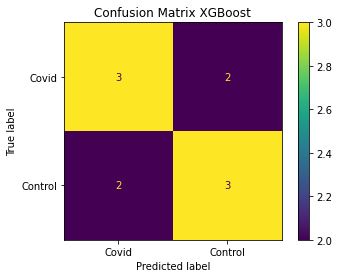

In [152]:
# cm = confusion_matrix(y_nested_test, pred, normalize='all')
cm = confusion_matrix(y_test, pred )
cmd = ConfusionMatrixDisplay(cm, display_labels=['Covid','Control'])
cmd.plot()
plt.title('Confusion Matrix XGBoost');

In [153]:
# y_probas = clf.predict_proba(X_nested_test)
y_probas = clf.predict_proba(X_test)

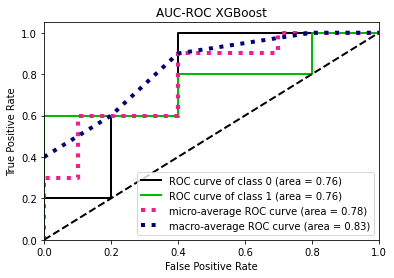

In [154]:
# skplt.metrics.plot_roc_curve(y_nested_test, y_probas)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.title('AUC-ROC XGBoost')
plt.show()

### Training on 1st 12 sensor array

In [18]:
df_train = df_train.iloc[:,:14]

In [19]:
df_train.shape

(21114, 14)

In [20]:
X_mi = df_train.groupby(['unique_id', 'timesteps']).mean()
X_nested = from_multi_index_to_nested(X_mi, instance_index="unique_id")
y = df.groupby('unique_id').first()['result']

In [21]:
X_nested.shape, y.shape

((138, 12), (138,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_nested, y, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((103, 12), (103,), (35, 12), (35,))

# Model Training

In [23]:
clf = MrSEQLClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [24]:
clf.score(X_train, y_train)

1.0

In [25]:
pred = clf.predict(X_test)
true = y_test
target_names = ['Control','Covid']
labels = [0,1]

In [26]:
clf_report = classification_report(true,
                                   pred,
                                   target_names=target_names)

print(clf_report)

              precision    recall  f1-score   support

     Control       1.00      1.00      1.00        26
       Covid       1.00      1.00      1.00         9

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



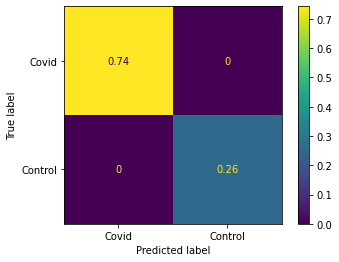

In [27]:
cm = confusion_matrix(y_test, pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Covid','Control'])
cmd.plot()

In [28]:
y_probas = clf.predict_proba(X_test)

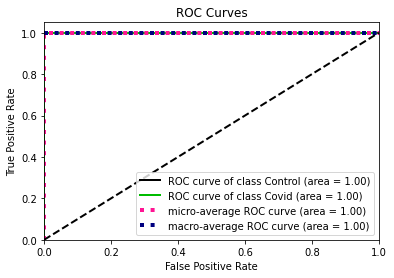

In [29]:
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()